## Environmental Ecology Programs in Africa
This notebook is to obtain a comprehensive list of African universities form two different sources of data:
    _local csv file containing university information, which includes details such as university name, country, longitude and latitude.
    _universities library, which provides programmatic access to a vast collection of university information.
By combining data from these sources, the notebook aims to create a more complete and accurate list of African universities.

The resulting dataset can be used for various purposes, such as research, analysis, or generating insights into higher education across the African continent.

In [1]:
import pandas as pd 
import warnings
pd.set_option('display.max_colwidth', None)

# Suppress FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
 
# Transform the data into a DataFrame.
program_df = pd.read_parquet('environmental_ecology_programs.parquet')
    
 
program_df.head(2)
 

,University,Department,Latitude,Longitude,countries
0,University of Cape Town,Department of Biological Sciences,-33.962800,18.471900,South Africa
1,Stellenbosch University,Department of Conservation Ecology and Entomology,-33.932105,18.864042,South Africa


#### sort path to access the required files 

In [2]:
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the directory where the shape file saved
child_name_shp = "afr_g2014_2013_0/afr_g2014_2013_0.shp"   
 
# Specify the name of the directory where the csv file saved
child_name_csv = "s.csv"   
  

In [3]:
import csv
import pandas as pd

# The path to your CSV file
csv_file =  os.path.join(notebook_path, child_name_csv)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file, delimiter=';' )

df = df.rename(columns={'Global Rank': 'name','Institution': 'country','Country': 'longitude','Sector': 'continent'})
df['continent'] = df['continent'].fillna('Africa')

import pandas as pd
import pycountry

# Function to convert country code to country name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
        else:
            return code
    except Exception as e:
        return code

# Update the 'Country' values in 'df1'
df['country'] = df['country'].apply(country_code_to_name)
df = df.drop('longitude', axis=1)

data_universities_all = pd.read_parquet('data_universities_all.parquet')
 
 
# Merge the data frames on 'Name' column
merged_df = df.merge(data_universities_all[['name', 'longitude', 'latitude']], on='name', how='left')

merged_df


,Rank,name,country,continent,longitude,latitude
0,170,"Lagos State University, Ojo",Nigeria,Africa,NaN,NaN
1,619,Badr University in Cairo,Egypt,Africa,31.718668,30.143254
2,1091,Stellenbosch University,South Africa,Africa,18.867900,-33.932100
3,1182,Fayoum University *,Egypt,Africa,NaN,NaN
4,1304,Universite Constantine 3,Algeria,Africa,NaN,NaN
...,...,...,...,...,...,...
245,4718,Universite Abdelhamid Ibn Badis de Mostaganem,Algeria,Africa,NaN,NaN
246,4729,Universite Mustapha Stambouli de Mascara,Algeria,Africa,NaN,NaN
247,4736,Universite Mohamed-Cherif Messaadia Souk Ahras,Algeria,Africa,NaN,NaN
248,4739,Universite Djillali Liabes de Sidi Bel Abbes,Algeria,Africa,NaN,NaN


In [4]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def add_coordinates(df, uni_address_column, coun_address_column):
    geolocator = Nominatim(user_agent="university-locator")

    def geocode_with_timeout(address):
        try:
            location = geolocator.geocode(address)
            return location
        except GeocoderTimedOut:
            return geocode_with_timeout(address)
        except Exception as e:
            # print(f"Geocoding error for address '{address}': {str(e)}")
            return None

    for index, row in df.iterrows():
        uni_address = row[uni_address_column]
        coun_address = row[coun_address_column]
        latitude = row['latitude']
        longitude = row['longitude']

        if pd.isnull(latitude) or pd.isnull(longitude):
            location = geocode_with_timeout(uni_address)

            if location is None:
                location = geocode_with_timeout(coun_address)

            if location:
                df.at[index, 'latitude'] = location.latitude
                df.at[index, 'longitude'] = location.longitude

    return df
concatenated_df = add_coordinates(merged_df, "name", "country")

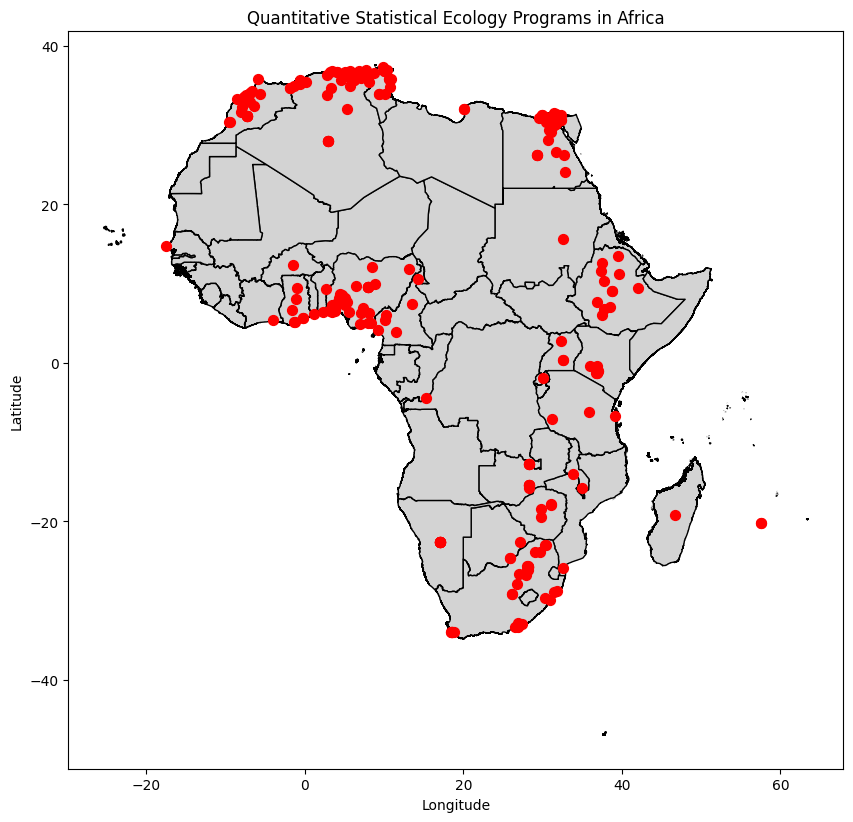

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scripts import map_plot
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the child directory or file
child_name = "afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the desired child directory or file name

# Construct the path to the child directory or file
child_path = os.path.join(notebook_path, child_name)
 
 
africa_shapefile = child_path # Replace with the actual file path

map_plot(africa_shapefile,concatenated_df,"Environmental/Ecology Programs in Africa")